In [1]:
import pandas as pd
import numpy as np
from surprise import Dataset

In [2]:
df_title= pd.read_csv('Movie_Id_Titles')
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df_title.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   item_id  1682 non-null   int64 
 1   title    1682 non-null   object
dtypes: int64(1), object(1)
memory usage: 26.4+ KB


In [3]:
movielens = Dataset.load_builtin('ml-100k')
movielens = pd.DataFrame(movielens.raw_ratings, columns = ['user_id', 'item_id', 'rating', 'timestamps'])
movielens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     100000 non-null  object 
 1   item_id     100000 non-null  object 
 2   rating      100000 non-null  float64
 3   timestamps  100000 non-null  object 
dtypes: float64(1), object(3)
memory usage: 3.1+ MB


In [4]:
movielens[['user_id', 'item_id', 'rating']] = movielens[['user_id', 'item_id', 'rating']].astype('int64')
movielens.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   user_id     100000 non-null  int64 
 1   item_id     100000 non-null  int64 
 2   rating      100000 non-null  int64 
 3   timestamps  100000 non-null  object
dtypes: int64(3), object(1)
memory usage: 3.1+ MB


In [5]:
movielens = pd.merge(movielens, df_title, on = 'item_id')

In [6]:
movielens.sort_values(by= 'item_id')

,user_id,item_id,rating,timestamps,title
3732,805,1,4,881695527,Toy Story (1995)
3759,124,1,3,890287733,Toy Story (1995)
3760,882,1,5,879864558,Toy Story (1995)
3761,779,1,4,875501555,Toy Story (1995)
3762,542,1,4,886532534,Toy Story (1995)
...,...,...,...,...,...
99958,863,1678,1,889289570,Mat' i syn (1997)
99938,863,1679,3,889289491,B. Monkey (1998)
99965,863,1680,2,889289570,Sliding Doors (1998)
99984,896,1681,3,887160722,You So Crazy (1994)


In [7]:
movielens.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   user_id     100000 non-null  int64 
 1   item_id     100000 non-null  int64 
 2   rating      100000 non-null  int64 
 3   timestamps  100000 non-null  object
 4   title       100000 non-null  object
dtypes: int64(3), object(2)
memory usage: 4.6+ MB


In [10]:
moviematrix = movielens.pivot_table(index = 'item_id', columns = 'user_id', values = 'rating')

In [11]:
moviematrix.head()

user_id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
item_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,4.0,NaN,NaN,4.0,4.0,NaN,NaN,NaN,4.0,...,2.0,3.0,4.0,NaN,4.0,NaN,NaN,5.0,NaN,NaN
2,3.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
3,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,4.0,...,5.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
5,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [136]:
#moviematrix[290]

In [13]:
cor = moviematrix.corr(method = 'pearson')

In [137]:
#cor

In [15]:
top30_users = cor[290].sort_values(ascending = False).head(31)
top30_users.drop(290, inplace = True)
top30_users

user_id
451    1.000000
724    1.000000
651    1.000000
131    1.000000
863    1.000000
252    1.000000
520    1.000000
578    1.000000
362    1.000000
750    0.944911
209    0.942809
489    0.927173
462    0.912871
797    0.912871
799    0.904534
814    0.870388
444    0.866025
482    0.866025
134    0.866025
423    0.852803
742    0.840152
3      0.818182
310    0.788342
441    0.787296
590    0.759257
598    0.755929
212    0.752549
367    0.750000
104    0.748798
359    0.745957
Name: 290, dtype: float64

In [16]:
neighbors = moviematrix[top30_users.index.tolist()]
neighbors.head()

user_id,451,724,651,131,863,252,520,578,362,750,...,742,3,310,441,590,598,212,367,104,359
item_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,4.0,NaN,5.0,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,4.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN


In [17]:
neighbors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1682 entries, 1 to 1682
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   451     98 non-null     float64
 1   724     85 non-null     float64
 2   651     21 non-null     float64
 3   131     30 non-null     float64
 4   863     107 non-null    float64
 5   252     21 non-null     float64
 6   520     23 non-null     float64
 7   578     24 non-null     float64
 8   362     25 non-null     float64
 9   750     33 non-null     float64
 10  209     33 non-null     float64
 11  489     109 non-null    float64
 12  462     33 non-null     float64
 13  797     26 non-null     float64
 14  799     24 non-null     float64
 15  814     35 non-null     float64
 16  444     24 non-null     float64
 17  482     26 non-null     float64
 18  134     25 non-null     float64
 19  423     64 non-null     float64
 20  742     26 non-null     float64
 21  3       54 non-null     float64
 22  

In [18]:
len(neighbors)

1682

# Lets figure out how many movies user ID 451 and 290 have in common (movies that they both rated) since it has a correlation of 1

In [146]:
a = movielens[movielens['user_id']==451].sort_values(by = 'item_id', ascending = True)

In [147]:
b = movielens[movielens['user_id']==290].sort_values(by = 'item_id', ascending = True)

In [148]:
a1 = a['item_id'].tolist()
b1 = b['item_id'].tolist()
#b1

In [149]:
intersection = set(b1).intersection(a1)
#intersection

## It turns out they both rated only 3 movies, which are movie_id 243, 323, 683

In [150]:
print(a[a['item_id'] == 243][['rating','item_id']],a[a['item_id'] == 323][['rating','item_id']], a[a['item_id'] == 683][['rating','item_id']])

       rating  item_id
77597       4      243        rating  item_id
23183       4      323        rating  item_id
71649       1      683


In [145]:
print(b[b['item_id'] == 243][['rating','item_id']],b[b['item_id'] == 323][['rating','item_id']], b[b['item_id'] == 683][['rating','item_id']])

       rating  item_id
77580       3      243        rating  item_id
23268       3      323        rating  item_id
71648       2      683


## If you manually calculate the pearson correlation, then you will get 1 as a result

In [25]:
import math

pearson_corr_nominator = (3-8/3)*(4-3)+(3-8/3)*(4-3)+(2-8/3)*(1-3)
sum_square_x = (3-8/3)**2 + (3-8/3)**2 + (2-8/3)**2
sum_square_y = (4-3)**2 + (4-3)**2 + (1-3)**2

sqrt = math.sqrt(sum_square_x*sum_square_y)

cor = pearson_corr_nominator/sqrt
cor

1.0

## we got a correlation of 1 because the sample size was small. So, lets work on that

In [242]:
movielens.groupby('item_id')['rating'].count().sort_values(ascending = False).head()

item_id
50     583
258    509
100    508
181    507
294    485
Name: rating, dtype: int64

In [243]:
movie_rating_num = movielens.groupby('item_id')['rating'].count().sort_values(ascending = False)

In [244]:
top_movie_ratings = movie_rating_num[movie_rating_num>100].index.tolist()
top_movie_ratings

[50,
 258,
 100,
 181,
 294,
 286,
 288,
 1,
 300,
 121,
 174,
 127,
 56,
 7,
 98,
 237,
 117,
 172,
 222,
 313,
 204,
 405,
 79,
 210,
 151,
 173,
 69,
 748,
 168,
 269,
 257,
 195,
 423,
 9,
 276,
 318,
 22,
 302,
 328,
 96,
 25,
 118,
 15,
 183,
 216,
 176,
 64,
 202,
 234,
 191,
 28,
 89,
 111,
 275,
 12,
 742,
 357,
 82,
 135,
 289,
 238,
 97,
 268,
 546,
 70,
 333,
 186,
 196,
 475,
 153,
 132,
 228,
 125,
 144,
 483,
 194,
 323,
 245,
 197,
 185,
 11,
 282,
 496,
 568,
 301,
 265,
 655,
 182,
 273,
 143,
 180,
 179,
 471,
 161,
 71,
 95,
 8,
 427,
 678,
 322,
 235,
 435,
 508,
 88,
 215,
 271,
 187,
 603,
 4,
 175,
 385,
 597,
 211,
 200,
 588,
 403,
 515,
 208,
 230,
 272,
 134,
 250,
 527,
 298,
 474,
 284,
 393,
 209,
 274,
 340,
 307,
 124,
 147,
 13,
 14,
 23,
 203,
 514,
 751,
 732,
 480,
 479,
 566,
 591,
 419,
 283,
 83,
 845,
 58,
 327,
 326,
 432,
 154,
 24,
 511,
 255,
 99,
 651,
 137,
 229,
 433,
 218,
 133,
 367,
 451,
 402,
 188,
 684,
 628,
 321,
 319,
 582,
 226,

In [245]:
items_over_100_rating = moviematrix.iloc[top_movie_ratings]
items_over_100_rating.head(10)

user_id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
item_id,,,,,,,,,,,,,,,,,,,,,
51,4.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
259,1.0,NaN,NaN,NaN,1.0,1.0,3.0,1.0,NaN,NaN,...,NaN,NaN,3.0,NaN,2.0,NaN,4.0,NaN,4.0,NaN
101,2.0,NaN,NaN,NaN,5.0,NaN,5.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182,4.0,NaN,NaN,NaN,NaN,4.0,4.0,5.0,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
295,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
287,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
289,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,5.0,NaN,1.0,NaN,3.0,NaN,NaN,NaN
2,3.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
301,NaN,4.0,NaN,5.0,NaN,2.0,NaN,4.0,NaN,NaN,...,NaN,NaN,3.0,1.0,NaN,NaN,3.0,NaN,NaN,NaN


In [285]:
n = items_over_100_rating.corr()[290].sort_values(ascending = False)[:50]
user_id = n.index.tolist()
n_ratings = items_over_100_rating[user_id]
n_ratings.tail(10)


user_id,467,675,583,599,799,797,789,404,132,134,...,860,759,831,289,45,182,245,359,104,761
item_id,,,,,,,,,,,,,,,,,,,,,
318,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
405,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.0,NaN,2.0,NaN,NaN,NaN,3.0,3.0,NaN
709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [249]:
#items_over_100_rating[1]
#b

In [300]:
d = [] # list of all the items for each user, contains many list from index 0-942
for userid in user_id: # user_ids 
    c = n_ratings[userid].tolist() # list of all movies(item_ids) that each user rated
    d.append(c)

e= [] # list of users who rated the same 40 items as user 290 
for i in range(50):
    if len(set(i290).intersection(d[i])) >4: #  
        e.append(i+1) # since user id starts at 1

In [301]:
e
#i290 = items_over_100_rating[290].tolist()

[7, 8, 11, 20, 21, 24, 25, 26, 30, 31, 33, 34, 36, 39, 40, 49, 50]

In [283]:
len(d)

50

In [297]:
n

user_id
467    1.000000
675    1.000000
583    1.000000
599    1.000000
799    1.000000
797    1.000000
789    1.000000
404    1.000000
132    1.000000
134    1.000000
290    1.000000
9      1.000000
310    1.000000
723    1.000000
209    1.000000
636    1.000000
150    0.944911
367    0.928477
212    0.911685
227    0.904534
333    0.877058
939    0.875000
814    0.870388
462    0.870388
917    0.866025
423    0.866025
257    0.866025
539    0.857493
923    0.844441
142    0.821429
3      0.818182
419    0.804400
433    0.790569
526    0.784465
30     0.780869
66     0.774597
396    0.772853
412    0.761840
726    0.755929
703    0.746004
860    0.727607
759    0.720577
831    0.713506
289    0.710047
45     0.707475
182    0.707107
245    0.701561
359    0.700649
104    0.694365
761    0.694022
Name: 290, dtype: float64

## Defining a function that users that have rated at least 20 items as the user id 290


In [184]:
moviematrix.index

Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
            1673, 1674, 1675, 1676, 1677, 1678, 1679, 1680, 1681, 1682],
           dtype='int64', name='item_id', length=1682)

In [185]:
moviematrix.head(3)

user_id,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
item_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,4.0,NaN,NaN,4.0,4.0,NaN,NaN,NaN,4.0,...,2.0,3.0,4.0,NaN,4.0,NaN,NaN,5.0,NaN,NaN
2,3.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
3,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [186]:
moviematrix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1682 entries, 1 to 1682
Columns: 943 entries, 1 to 943
dtypes: float64(943)
memory usage: 12.1 MB


In [187]:
#moviematrix[290]

In [188]:
#c = moviematrix[moviematrix['user_id']==290]

In [189]:
#diff = moviematrix - m[:,np.newaxis]
#diff

In [190]:
column_names = moviematrix.columns.tolist()

In [191]:
d = [] # list of all users who rated a list of items, contains many list from index 0-942
for user_id in column_names: # user_ids 
    c = items_over_100_rating[movielens['user_id']== user_id]['item_id'].tolist() # list of all movies(item_ids) that each user rated
    d.append(c)

e= [] # list of users who rated the same 40 items as user 290 
for i in range(943):
    if len(set(b1).intersection(d[i])) >40: #  
        e.append(i+1) # since user id starts at 1


<ipython-input-191-da9958acaabe>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c = items_over_100_rating[movielens['user_id']== user_id]['item_id'].tolist() # list of all movies(item_ids) that each user rated


KeyError: 'item_id'

In [192]:
common_users = moviematrix[e]

common_users[290] = moviematrix[290]
#common_users[290]

<ipython-input-192-a21b2babedbf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  common_users[290] = moviematrix[290]


In [193]:
neighbors_290= common_users.corr()[290].sort_values(ascending =False).head(31).drop(290)
neighbors_290.index

Int64Index([ 70, 144, 901, 275, 746, 497, 536, 709, 514, 899, 896, 506, 178,
             22, 654, 882, 807, 210, 298, 311, 625, 545, 721, 267, 405, 453,
            130, 125,  82, 254],
           dtype='int64', name='user_id')

In [194]:
weight_290 = neighbors_290.values.tolist()
weight_290

[0.5734294862206607,
 0.4880933232415876,
 0.485319520221204,
 0.4679260683559841,
 0.4653035153262718,
 0.4612440266476652,
 0.4542123631295835,
 0.4494569672125182,
 0.44769812724919733,
 0.44506738078590713,
 0.4434367071801006,
 0.4426951314074411,
 0.42981940766847343,
 0.4214594610106831,
 0.4159075428846866,
 0.4139108864788193,
 0.41110426944746964,
 0.4091200580388309,
 0.4040478795414774,
 0.4025805840389252,
 0.3976192214873009,
 0.39419993570534967,
 0.38367232887590075,
 0.38112422091488285,
 0.3800295214867149,
 0.377809972666351,
 0.37353447461591643,
 0.3713842715870148,
 0.37056609568235227,
 0.36436247664621785]

In [195]:
neighborsmat_290= moviematrix[neighbors_290.index.tolist()]

In [196]:
neighborsmat_290.corr().head(2)

user_id,70,144,901,275,746,497,536,709,514,899,...,625,545,721,267,405,453,130,125,82,254
user_id,,,,,,,,,,,,,,,,,,,,,
70,1.00000,0.31739,0.138736,0.294655,0.367811,0.296406,0.453117,0.184466,0.24060,0.384004,...,0.531585,0.478491,0.262277,0.597430,0.412459,0.386383,0.279581,0.379752,0.423367,0.339989
144,0.31739,1.00000,0.277885,0.148359,-0.059990,0.345031,0.357661,0.331057,0.17335,0.185296,...,0.318010,0.044675,0.218225,0.234389,0.233543,0.085268,0.246670,0.362306,0.572057,0.534382


In [197]:
mean_290 = moviematrix[290].mean()
mean_290

3.3533333333333335

In [198]:
mean_rating_neighbors = neighborsmat_290.mean(axis =0)

In [199]:
column_num290 = neighborsmat_290.columns.tolist()
column_num290

[70,
 144,
 901,
 275,
 746,
 497,
 536,
 709,
 514,
 899,
 896,
 506,
 178,
 22,
 654,
 882,
 807,
 210,
 298,
 311,
 625,
 545,
 721,
 267,
 405,
 453,
 130,
 125,
 82,
 254]

In [200]:
neighborsmat_290_fillna = neighborsmat_290.fillna(0)

In [201]:
n_index = neighborsmat_290_fillna.index.tolist()

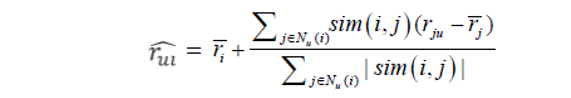


In [202]:
neighborsmat_290_fillna.value_counts()

70   144  901  275  746  497  536  709  514  899  896  506  178  22   654  882  807  210  298  311  625  545  721  267  405  453  130  125  82   254
0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0    466
                                                                                                                        1.0  0.0  0.0  0.0  0.0  0.0    208
                                                                                                              3.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     16
                                                                                                              0.0  0.0  2.0  0.0  0.0  0.0  0.0  0.0     14
     4.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0      9
                                                                       

In [203]:
# definin a function that selects movies(items_id) that have at least 10 ratings

def movie_ratings(df):
    count_nonzeros_list = []
    for i in range(len(df)):
        row = df.iloc[i]
        count_nonzeros = 0
        for col_name in column_num290:
            if row[col_name] != 0:
                count_nonzeros += 1
        count_nonzeros_list.append(count_nonzeros)
    l = pd.Series(count_nonzeros_list, index = n_index)
    return l

In [204]:
movie_ratings(neighborsmat_290_fillna)

1       24
2       13
3        6
4       13
5        6
        ..
1678     0
1679     0
1680     0
1681     1
1682     0
Length: 1682, dtype: int64

In [135]:
# Getting movies with at least 10 ratings
rates = movie_ratings(neighborsmat_290_fillna)
m = []
for i in n_index:
    if rates[i]>10:
        m.append(i)
m

[1,
 2,
 4,
 7,
 8,
 11,
 12,
 15,
 22,
 24,
 25,
 28,
 29,
 31,
 50,
 54,
 56,
 58,
 62,
 64,
 66,
 68,
 69,
 70,
 71,
 73,
 77,
 79,
 82,
 83,
 87,
 88,
 89,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 117,
 118,
 121,
 125,
 127,
 132,
 135,
 143,
 144,
 151,
 153,
 161,
 168,
 172,
 173,
 174,
 175,
 176,
 179,
 180,
 181,
 183,
 186,
 187,
 188,
 191,
 193,
 194,
 195,
 196,
 197,
 199,
 200,
 202,
 203,
 204,
 208,
 209,
 210,
 211,
 214,
 215,
 216,
 218,
 222,
 226,
 227,
 228,
 229,
 230,
 231,
 233,
 234,
 235,
 237,
 238,
 239,
 250,
 257,
 258,
 265,
 274,
 275,
 282,
 288,
 294,
 300,
 318,
 357,
 367,
 380,
 384,
 385,
 386,
 393,
 399,
 402,
 403,
 405,
 418,
 419,
 423,
 427,
 431,
 432,
 435,
 449,
 451,
 455,
 465,
 470,
 471,
 472,
 483,
 496,
 501,
 510,
 511,
 515,
 523,
 527,
 546,
 550,
 554,
 566,
 568,
 578,
 588,
 597,
 651,
 655,
 679,
 684,
 692,
 720,
 732,
 739,
 742,
 746,
 748,
 751]

In [133]:
rates.index

Int64Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
            ...
            1673, 1674, 1675, 1676, 1677, 1678, 1679, 1680, 1681, 1682],
           dtype='int64', length=1682)

In [114]:
# lets check the last 10 rows 
last_10row = neighborsmat_290_fillna.tail(10)
last_10row.loc[1681]

user_id
70     0.0
144    0.0
901    0.0
275    0.0
746    0.0
497    0.0
536    0.0
709    0.0
514    0.0
899    0.0
896    3.0
506    0.0
178    0.0
22     0.0
654    0.0
882    0.0
807    0.0
210    0.0
298    0.0
311    0.0
625    0.0
545    0.0
721    0.0
267    0.0
405    0.0
453    0.0
130    0.0
125    0.0
82     0.0
254    0.0
Name: 1681, dtype: float64

In [68]:
for i in range(neighborsmat_290_fillna):
        row = neighborsmat.iloc[i]
        for col_name in column_num290:
            if row[col_name] != 0:
                print(row)

TypeError: 'DataFrame' object cannot be interpreted as an integer

In [45]:
neighborsmat_290_fillna.columns

Int64Index([ 70, 144, 901, 275, 746, 497, 536, 709, 514, 899, 896, 506, 178,
             22, 654, 882, 807, 210, 298, 311, 625, 545, 721, 267, 405, 453,
            130, 125,  82, 254],
           dtype='int64', name='user_id')

In [46]:
column_num290 = neighborsmat_290_fillna.columns.tolist()
len(column_num290)

30

In [47]:
len(weight_290)

30

In [48]:
for j in range(1682):
    row = neighborsmat_290_fillna.iloc[j]


In [49]:

neighborsmat_290.iloc[1680]

user_id
70     NaN
144    NaN
901    NaN
275    NaN
746    NaN
497    NaN
536    NaN
709    NaN
514    NaN
899    NaN
896    3.0
506    NaN
178    NaN
22     NaN
654    NaN
882    NaN
807    NaN
210    NaN
298    NaN
311    NaN
625    NaN
545    NaN
721    NaN
267    NaN
405    NaN
453    NaN
130    NaN
125    NaN
82     NaN
254    NaN
Name: 1681, dtype: float64

In [50]:
sum_weight_290 = []
for j in range(1683):
    row = neighborsmat_290_fillna.iloc[j]
    row_weight = []
    for i in column_num290:  
        if row[i] != 0:
            row_weight.append(weight_290[i])
    sum_weight_290.append(pd.Series(row_weight).sum())

IndexError: list index out of range

In [51]:
# the nominator of the pred equation above
def one_row_diff(df,index):
    sum_weight = []
    row = df.iloc[index]
    for i in column_num290:
        if row[i] != 0:
            s= (row[i] - mean_rating_neighbors[i])*weight_290[i]
            sum_weight.append(s)
    sum_weight_series = pd.Series(sum_weight).sum()
    return sum_weight_series

In [52]:
weight_factor =[]
for j in range(100):
    weight_factor.append(one_row_diff(df,j))

NameError: name 'df' is not defined

In [53]:
normalized_value = pd.Series(weight_factor)/pd.Series(sum_weight_3712) +4.5
normalized_value

<ipython-input-53-e59f834fc963>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  normalized_value = pd.Series(weight_factor)/pd.Series(sum_weight_3712) +4.5


NameError: name 'sum_weight_3712' is not defined

In [54]:
#neighborsmat_290_fillna

In [55]:
# lets test if we got the right users, so we are going to investigate if user 1 has at least 40 items in common with user 290
# the answer is yesssss

c = movielens[movielens['user_id']== 44]['item_id'].tolist()
h = set(b1).intersection(c)
len(h)

74

In [56]:
len(movielens[movielens['user_id']== 44][['item_id', 'user_id']].sort_values(by = 'item_id',ascending = True)) # rated 151 items and 74 in common with user 290

151

In [57]:
intersect = set(b1).intersection(c)


In [58]:
# lets see which ones they have in common
m = movielens[movielens['user_id']== 44][['item_id', 'user_id']].sort_values(by = 'item_id',ascending = True)

In [59]:
#b.merge(m, on = 'item_id')


In [60]:
#name of the user_id
#column_names
#c = movielens[movielens['user_id']== 451]['item_id'].tolist()   # list of all movies(item_ids) that user_id rated

In [61]:
#neighbors_290_test = common_users.corr()[290].sort_values(ascending =False).head(31)
#neighbors_290_test

In [62]:
#neighborsmat_290_fillna.iloc[0]

In [63]:
#column_num290

In [64]:
neighborsmat_290_fillna

user_id,70,144,901,275,746,497,536,709,514,899,...,625,545,721,267,405,453,130,125,82,254
item_id,,,,,,,,,,,,,,,,,,,,,
1,4.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,5.0,3.0,...,0.0,5.0,5.0,0.0,0.0,0.0,5.0,4.0,4.0,3.0
2,0.0,0.0,0.0,0.0,3.0,1.0,4.0,4.0,0.0,3.0,...,0.0,0.0,0.0,3.0,1.0,0.0,4.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,4.0,5.0,0.0,2.0,0.0
4,0.0,4.0,0.0,0.0,0.0,3.0,0.0,3.0,4.0,0.0,...,4.0,0.0,0.0,0.0,4.0,4.0,2.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,3.0,4.0,0.0,4.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1679,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
weight_290

[0.5734294862206607,
 0.4880933232415876,
 0.485319520221204,
 0.4679260683559841,
 0.4653035153262718,
 0.4612440266476652,
 0.4542123631295835,
 0.4494569672125182,
 0.44769812724919733,
 0.44506738078590713,
 0.4434367071801006,
 0.4426951314074411,
 0.42981940766847343,
 0.4214594610106831,
 0.4159075428846866,
 0.4139108864788193,
 0.41110426944746964,
 0.4091200580388309,
 0.4040478795414774,
 0.4025805840389252,
 0.3976192214873009,
 0.39419993570534967,
 0.38367232887590075,
 0.38112422091488285,
 0.3800295214867149,
 0.377809972666351,
 0.37353447461591643,
 0.3713842715870148,
 0.37056609568235227,
 0.36436247664621785]